In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
df = pd.read_csv('outfits.csv')

In [53]:
# Menampilkan 5 baris pertama dataset
print("5 Baris pertama dari dataset:")
display(df.head())

5 Baris pertama dari dataset:


,Brand Name,Price,Category,Country
0,49,-0.682740,2,4
1,20,-0.710949,2,5
2,46,-0.654531,0,3
3,2,-0.569903,5,1
4,30,-0.457067,5,7


In [29]:
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand Name  50 non-null     object 
 1   Price       50 non-null     float64
 2   Category    50 non-null     object 
 3   Country     50 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.7+ KB
None


In [52]:
# Menampilkan statistik deskriptif dari data numerik
print("Statistik deskriptif dari data numerik:")
display(df.describe())

Statistik deskriptif dari data numerik:


,Brand Name,Price,Category,Country
count,50.00000,5.000000e+01,50.000000,50.000000
mean,24.50000,9.325873e-17,2.680000,4.720000
std,14.57738,1.010153e+00,1.963337,2.611122
min,0.00000,-7.532348e-01,0.000000,0.000000
25%,12.25000,-6.545239e-01,1.000000,2.000000
50%,24.50000,-4.852477e-01,3.000000,6.000000
75%,36.75000,1.283015e-01,4.000000,7.000000
max,49.00000,3.410409e+00,6.000000,7.000000


In [51]:
# Menampilkan jumlah missing values per kolom dalam bentuk tabel
print("Jumlah missing values per kolom:")
missing_values = df.isnull().sum()
display(pd.DataFrame(missing_values, columns=['Missing Values']))

Jumlah missing values per kolom:


,Missing Values
Brand Name,0
Price,0
Category,0
Country,0


Visualisasi missing values (jika ada):


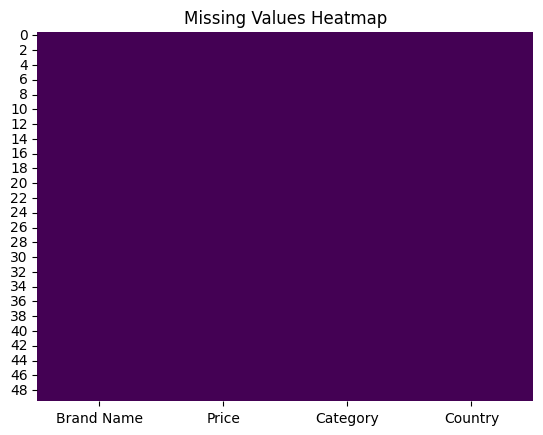

In [50]:
# Visualisasi missing values menggunakan heatmap
print("Visualisasi missing values (jika ada):")
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [33]:
# Mengatasi missing values (jika ada)
# Isi missing value di kolom numerik dengan mean
df['Price'].fillna(df['Price'].mean(), inplace=True)

<ipython-input-33-cf628792a050>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


In [34]:
# Mengisi missing value di kolom kategorikal dengan modus
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

<ipython-input-34-3f073a94e2f8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0], inplace=True)


Visualisasi distribusi harga:


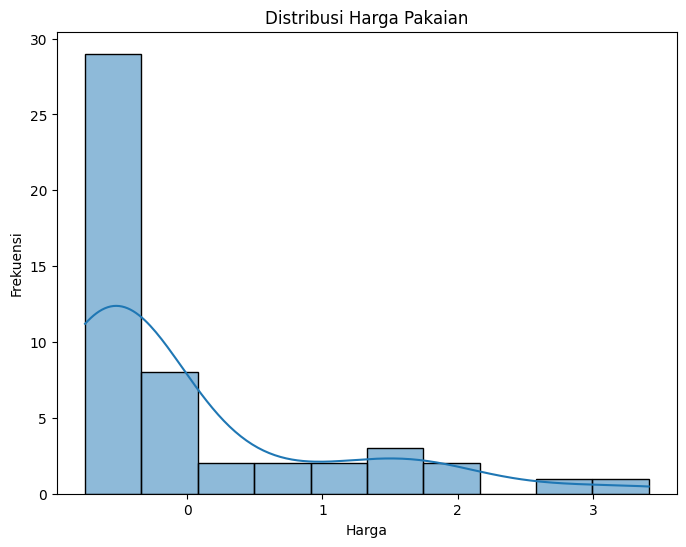

In [49]:
# Visualisasi distribusi harga menggunakan histogram
print("Visualisasi distribusi harga:")
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title("Distribusi Harga Pakaian")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()

In [36]:
# Encode kolom kategorikal (Brand Name, Category, Country) menggunakan LabelEncoder
label_encoder = LabelEncoder()

df['Brand Name'] = label_encoder.fit_transform(df['Brand Name'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Country'] = label_encoder.fit_transform(df['Country'])

In [48]:
# Menampilkan 5 baris pertama setelah encoding dalam bentuk tabel
print("5 Baris pertama setelah encoding:")
display(df.head())

5 Baris pertama setelah encoding:


,Brand Name,Price,Category,Country
0,49,-0.682740,2,4
1,20,-0.710949,2,5
2,46,-0.654531,0,3
3,2,-0.569903,5,1
4,30,-0.457067,5,7


In [38]:
# Melakukan normalisasi kolom 'Price' menggunakan StandardScaler
scaler = StandardScaler()
df['Price'] = scaler.fit_transform(df[['Price']])

In [46]:
# Menampilkan 5 baris pertama setelah normalisasi dalam bentuk tabel
print("5 Baris pertama setelah normalisasi harga:")
display(df.head())

5 Baris pertama setelah normalisasi harga:


,Brand Name,Price,Category,Country
0,49,-0.682740,2,4
1,20,-0.710949,2,5
2,46,-0.654531,0,3
3,2,-0.569903,5,1
4,30,-0.457067,5,7


Visualisasi korelasi antar fitur:


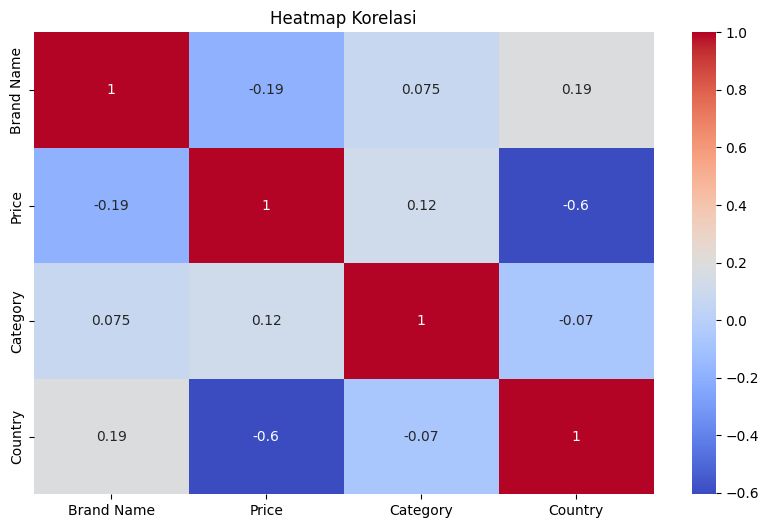

In [47]:
# Menampilkan korelasi antar fitur menggunakan heatmap
print("Visualisasi korelasi antar fitur:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()


In [43]:
# Menampilkan jumlah brand berdasarkan kategori dalam bentuk tabel
print("Jumlah brand berdasarkan kategori:")
category_counts = df['Category'].value_counts()
display(pd.DataFrame(category_counts, columns=['Count']))

Jumlah brand berdasarkan kategori:


,Count


Visualisasi jumlah brand berdasarkan kategori:


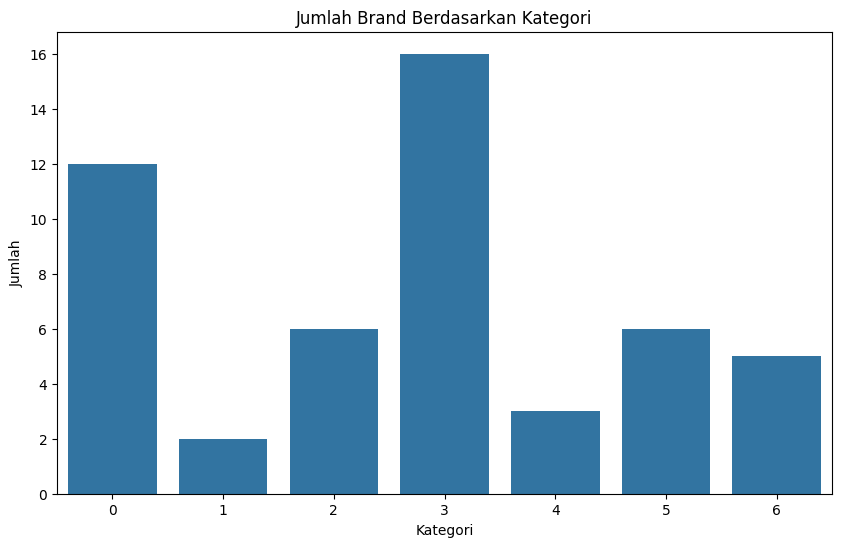

In [45]:
# Visualisasi jumlah brand berdasarkan kategori menggunakan bar plot
print("Visualisasi jumlah brand berdasarkan kategori:")
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title("Jumlah Brand Berdasarkan Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

In [54]:
# Menyimpan dataset yang sudah dipreprocessing ke dalam file baru
df.to_csv("preprocessed_outfits.csv", index=False)

In [55]:
# Menampilkan mapping hasil encoding untuk kolom kategorikal dalam bentuk tabel
print("Mapping hasil encoding untuk kolom kategorikal:")
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
display(pd.DataFrame(list(category_mapping.items()), columns=['Original', 'Encoded']))

Mapping hasil encoding untuk kolom kategorikal:


,Original,Encoded
0,France,0
1,Germany,1
2,Italy,2
3,Japan,3
4,Spain,4
5,Sweden,5
6,UK,6
7,USA,7
